# Machine Learning Approach For Risk Prediction Based On Maternal Health

### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report

### Load Dataset

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

### Dataset Overview

In [3]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [4]:
df.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
707,32,120,90,6.9,98.0,70,mid risk
380,13,90,65,7.8,101.0,80,mid risk
242,15,80,60,7.0,98.0,80,low risk
818,60,120,85,15.0,98.0,60,mid risk
699,34,120,75,8.0,98.0,70,low risk
293,23,120,80,7.7,98.0,70,low risk
116,30,120,80,7.9,101.0,76,high risk
531,15,120,80,7.5,98.0,70,mid risk
349,25,120,90,6.9,98.0,80,low risk
139,18,120,80,6.9,102.0,76,mid risk


In [5]:
df.tail(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1004,13,90,65,9.0,101.0,80,high risk
1005,17,90,65,7.7,103.0,67,high risk
1006,17,85,60,6.3,102.0,86,high risk
1007,40,120,75,7.7,98.0,70,high risk
1008,48,120,80,11.0,98.0,88,high risk
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
df.shape

(1014, 7)

In this dataset,
    there are 1014 rows and 7 columns
    
    Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate these are the feature
    RiskLevel is the target column

In [7]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Age, SystolicBP, DiastolicBP, HeartRate are containing Integer Data

BS, BodyTemp are containing Floating Data

RiskLevel is containing Categorical Data

### Check Null Values

In [9]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

No null values in any columns

### Check Zero Values

In [10]:
print('Number of zero values in Age column: ' , df[df['Age']==0].shape[0])

Number of zero values in Age column:  0


In [11]:
print('Number of zero values in SystolicBP column: ' , df[df['SystolicBP']==0].shape[0])

Number of zero values in SystolicBP column:  0


In [12]:
print('Number of zero values in DiastolicBP column: ' , df[df['DiastolicBP']==0].shape[0])

Number of zero values in DiastolicBP column:  0


In [13]:
print('Number of zero values in BS column: ' , df[df['BS']==0].shape[0])

Number of zero values in BS column:  0


In [14]:
print('Number of zero values in BodyTemp column: ' , df[df['BodyTemp']==0].shape[0])

Number of zero values in BodyTemp column:  0


In [15]:
print('Number of zero values in HeartRate column: ' , df[df['HeartRate']==0].shape[0])

Number of zero values in HeartRate column:  0


There are no zero values in any column

### Encoding RiskLevel Columnn's Data

In [16]:
df['RiskLevel'].replace(['low risk', 'mid risk', 'high risk'],[0,1,2], inplace=True)

In [17]:
print(df['RiskLevel'])

Here 'low risk' class encoded as 0, 'mid risk' class encoded as 1 and 'high risk' class encoded as 2

### Data Visualization

low Risk (0):  406
mid Risk (1):  336
high Risk (2):  272


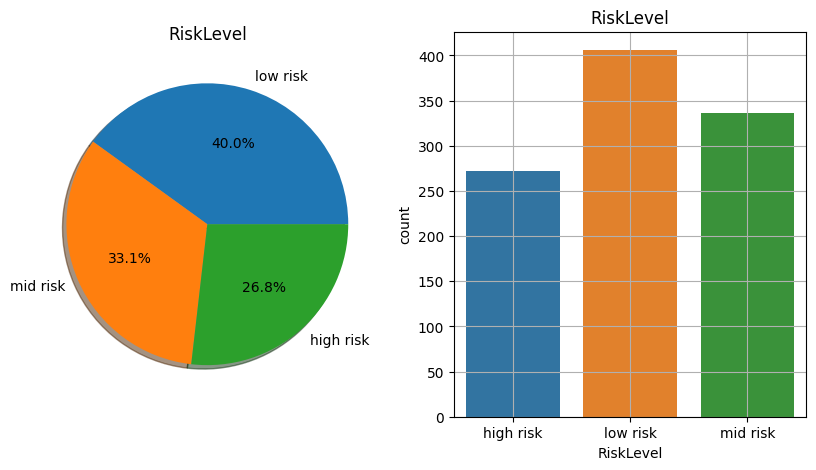

In [18]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['RiskLevel'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('RiskLevel')
ax[0].set_ylabel('')
sns.countplot(x=df["RiskLevel"])
ax[1].set_title('RiskLevel')
l,m,h=df['RiskLevel'].value_counts()
print('low Risk (0): ',l)
print('mid Risk (1): ',m)
print('high Risk (2): ',h)
plt.grid()
plt.show()

#### Histogram

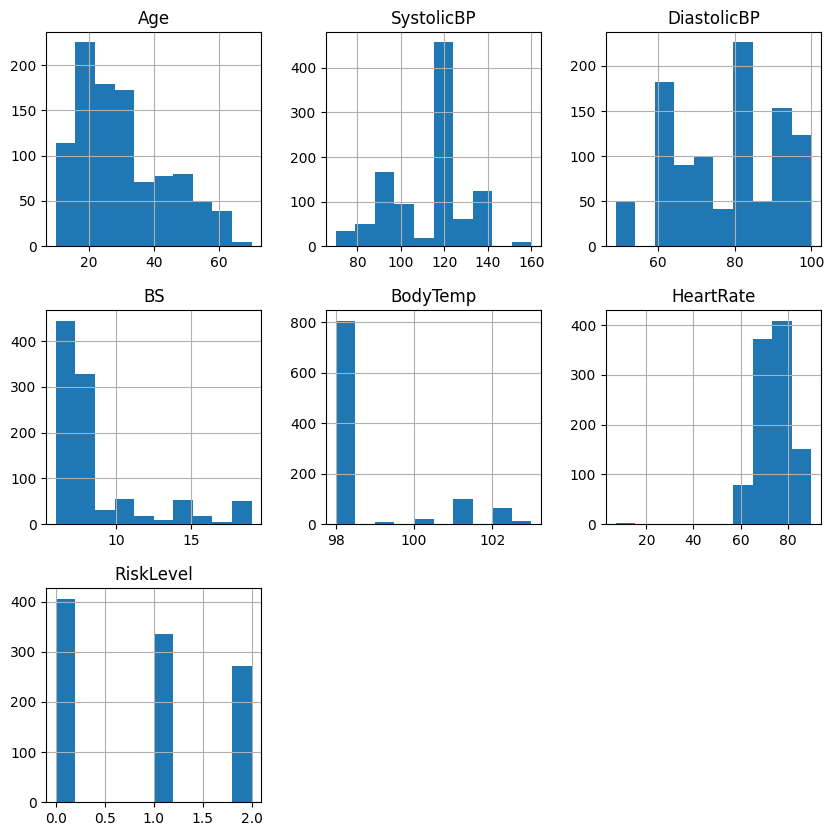

In [19]:
df.hist(bins=10,figsize=(10,10))
plt.show()

#### Scatterplot

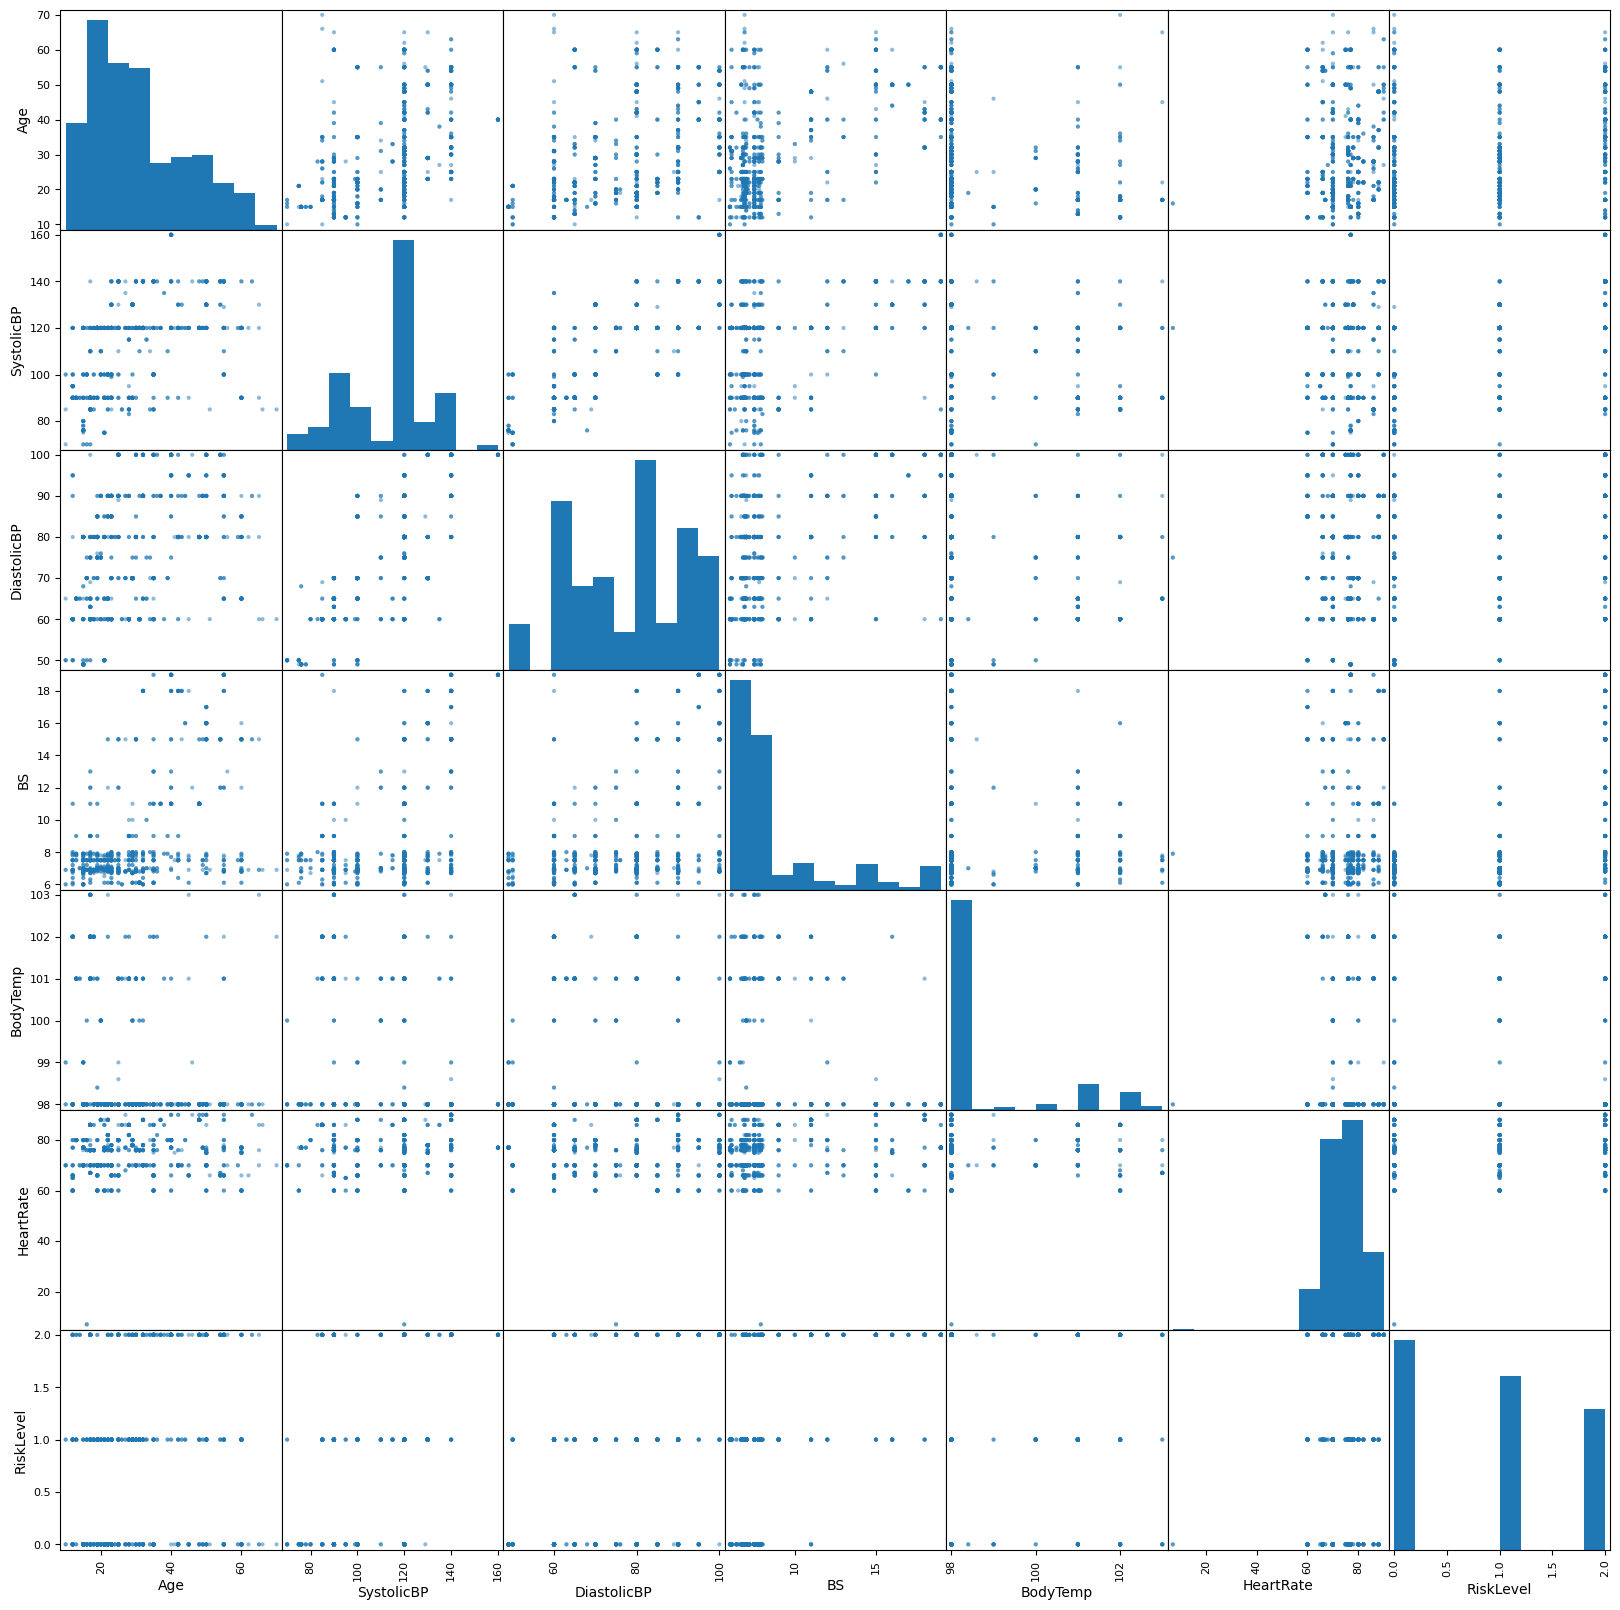

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

#### Pairplot

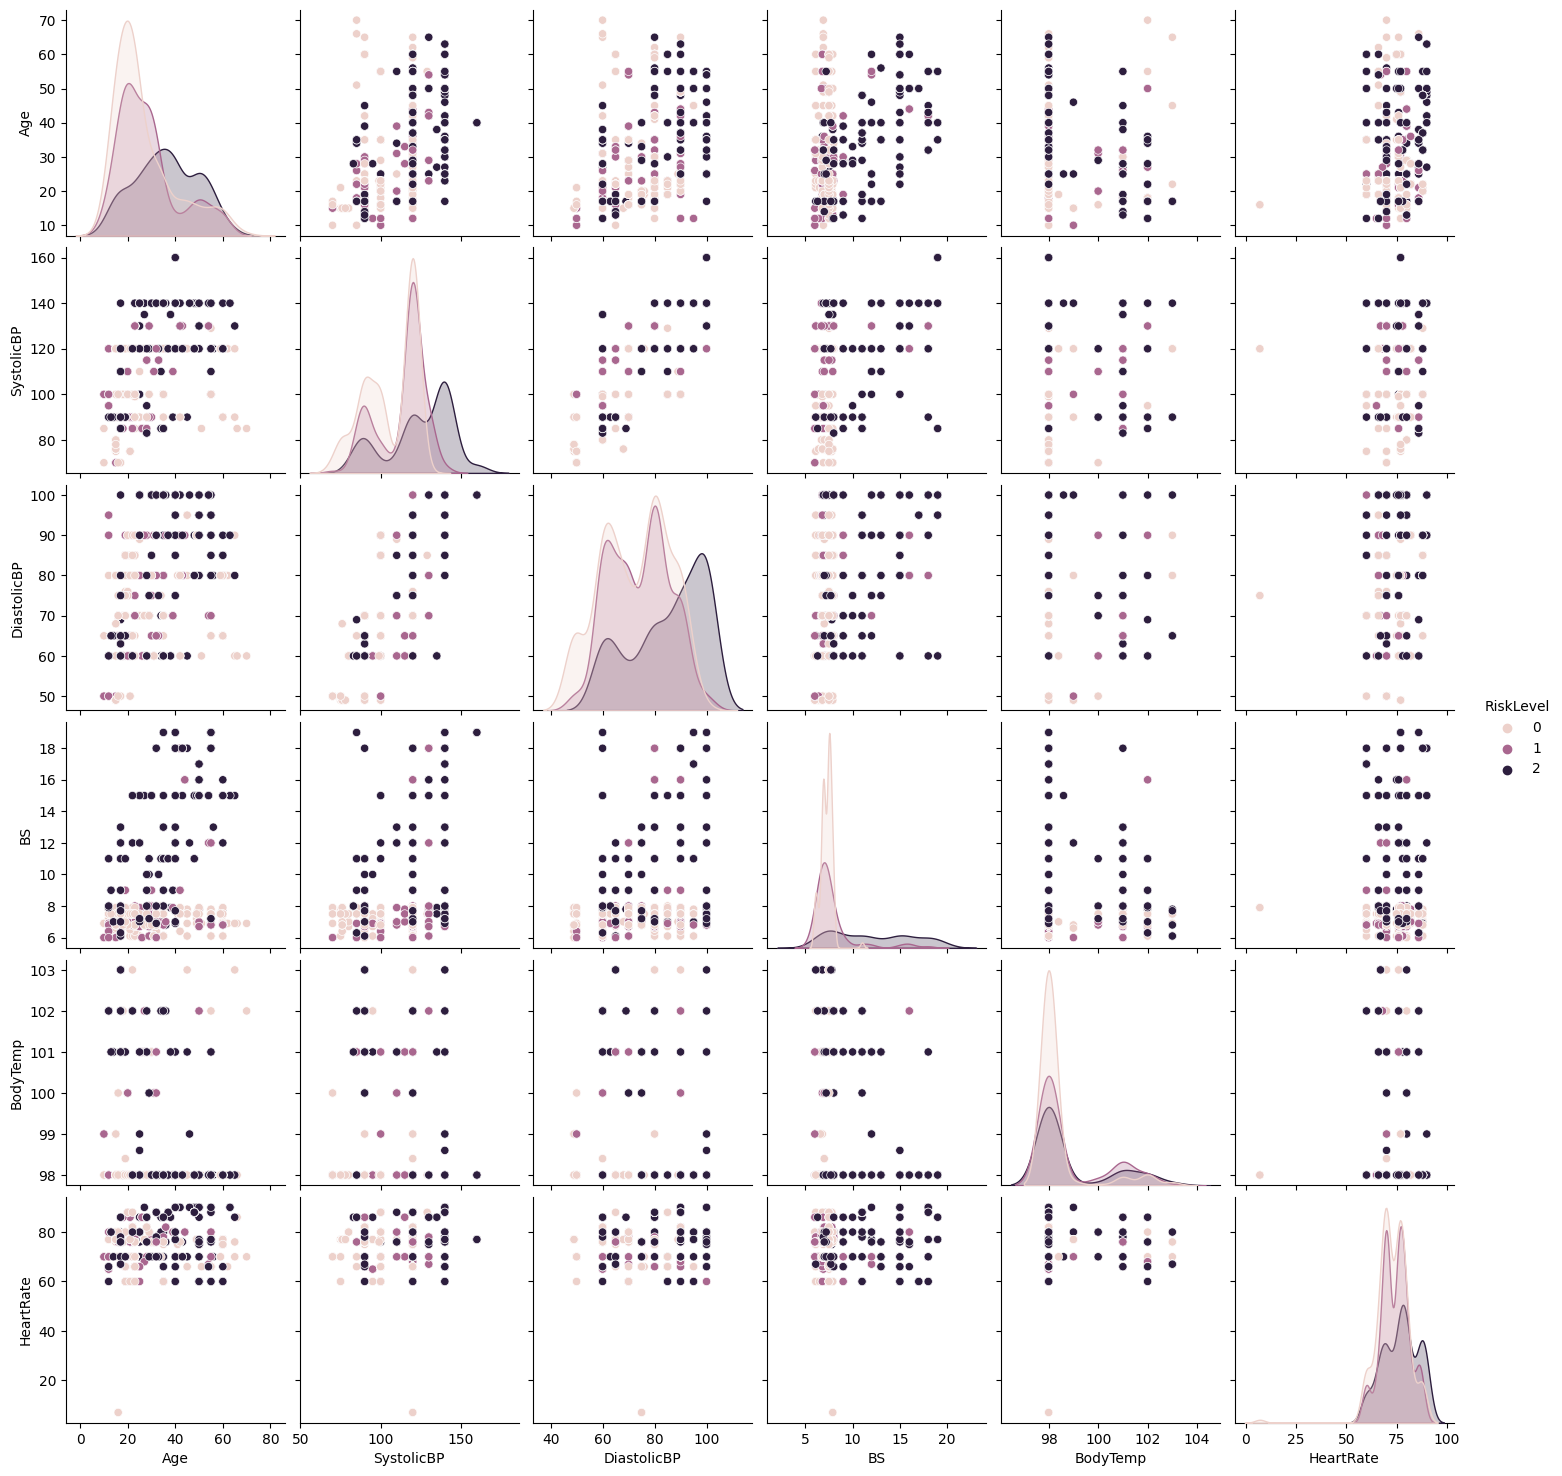

In [21]:
sns.pairplot(data=df,hue='RiskLevel')
plt.show()

### Correlation Analysis

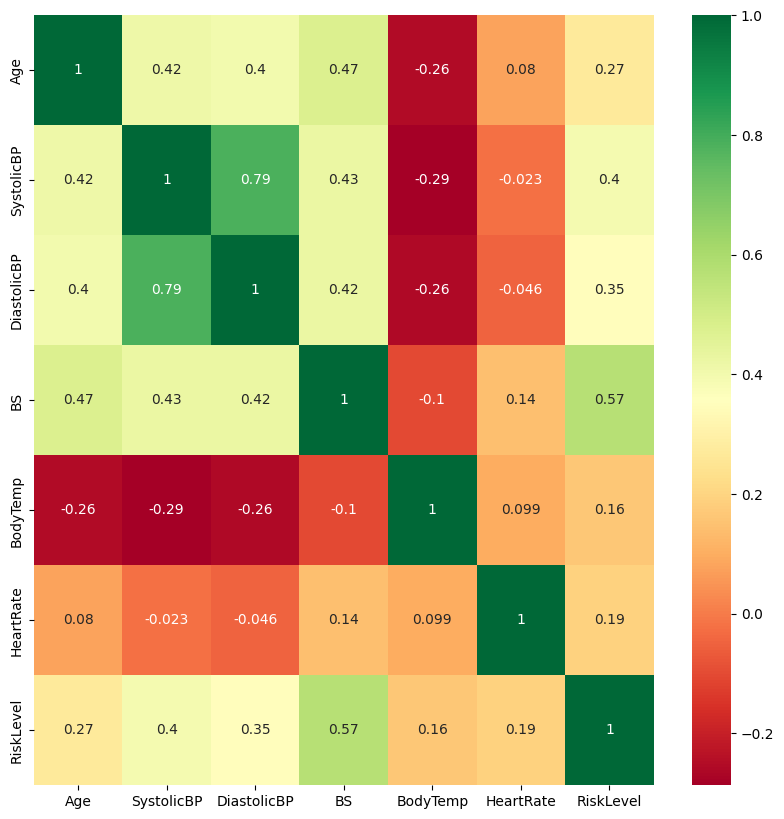

In [22]:
import seaborn as sns
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two variables/features. This particular type of analysis is useful when a researcher wants to establish if there are possible connections between variables.(Mainly helps to select the best feature related with the target or,output)

## Split Dataset into Features (X) and Label (Y)

In [23]:
X = df.drop('RiskLevel', axis=1)

In [24]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [25]:
y = df['RiskLevel']

In [26]:
y.head(10)

0    2
1    2
2    2
3    2
4    0
5    2
6    1
7    2
8    1
9    2
Name: RiskLevel, dtype: int64

## Perform 10-Fold Cross Validation for Each Classification Algorithm and Evaluation

In [27]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "ridge_clf": RidgeClassifier(alpha=1),
    "Logistic Regression": LogisticRegression(max_iter=4000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(),
    "Xgboost": xgb.XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [28]:
n_splits = 10

10-Fold Cross Validation so splitting number is 10

In [29]:
for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")
    print("-" * 30)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    precision_list = []
    recall_list = []
    f1score_list = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        
        # Split the data into training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test)

        # Compute the precision, recall, f1-score, and accuracy
        report = classification_report(y_test, y_pred, output_dict=True)
        precision_list.append(report["0"]["precision"])
        recall_list.append(report["0"]["recall"])
        f1score_list.append(report["0"]["f1-score"])
        accuracy_list.append(report["accuracy"])

    # Compute the average precision, recall, f1-score, and accuracy over all folds
    avg_precision = (sum(precision_list) / n_splits)*100
    avg_recall = (sum(recall_list) / n_splits)*100
    avg_f1score = (sum(f1score_list) / n_splits)*100
    avg_accuracy = (sum(accuracy_list) / n_splits)*100

    print(f"Average precision: {avg_precision:.2f}")
    print(f"Average recall: {avg_recall:.2f}")
    print(f"Average f1-score: {avg_f1score:.2f}")
    print(f"Average accuracy: {avg_accuracy:.2f}")
    print("-" * 30)

Classifier: Naive Bayes
------------------------------
Average precision: 57.01
Average recall: 91.91
Average f1-score: 70.18
Average accuracy: 60.27
------------------------------
Classifier: SVM
------------------------------
Average precision: 53.58
Average recall: 85.18
Average f1-score: 65.37
Average accuracy: 58.68
------------------------------
Classifier: ridge_clf
------------------------------
Average precision: 62.13
Average recall: 85.45
Average f1-score: 71.84
Average accuracy: 62.62
------------------------------
Classifier: Logistic Regression
------------------------------
Average precision: 64.03
Average recall: 78.91
Average f1-score: 70.37
Average accuracy: 62.32
------------------------------
Classifier: Linear Discriminant Analysis
------------------------------
Average precision: 64.23
Average recall: 79.04
Average f1-score: 70.64
Average accuracy: 62.42
------------------------------
Classifier: Random Forest
------------------------------
Average precision: 89.8